# More Pandas

![more_pandas](https://media.giphy.com/media/H0Qi5W2KzU5UI/giphy.gif)

### Scenario
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and to get more information about planning. In this lecture, we'll look at a real data set collected by Austin Animal Center.  The code below will return the last 1000 animal outcomes that have occurred.  We will use our pandas skills from the last lecture and learn some new ones in order to explore these data further.




#### Our goals in this notebook are to be able to: <br/>

- Apply and use `.map()`, `apply()`, and `.applymap()` from the Pandas library
- Introduce lambda functions and use them in coordination with above functions
- Explain what a groupby object is and split a DataFrame using `.groupby()`


#### Getting started

Let's take a moment to download and to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). 

Let's take a look at the data:

In [75]:
import numpy as np
import pandas as pd
import requests

%load_ext autoreload
%autoreload 2

from src.student_caller import one_random_student, three_random_students
from src.student_list import student_list

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
url = 'https://data.austintexas.gov/resource/9t4d-g238.json'
response = requests.get(url)
animals = pd.DataFrame(response.json())
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,A821019,Spot,2020-12-08T12:37:00.000,2020-12-08T12:37:00.000,2017-04-03T00:00:00.000,Adoption,Dog,Neutered Male,3 years,Pit Bull,White/Black,NaN
1,A824438,*Rose,2020-12-08T12:27:00.000,2020-12-08T12:27:00.000,2011-11-27T00:00:00.000,Adoption,Dog,Spayed Female,9 years,German Shepherd,Tan/Black,NaN
2,A825587,*Ludwig,2020-12-08T12:22:00.000,2020-12-08T12:22:00.000,2011-11-06T00:00:00.000,Adoption,Cat,Neutered Male,9 years,Domestic Medium Hair,Cream Tabby,Foster
3,A819626,NaN,2020-12-08T11:53:00.000,2020-12-08T11:53:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,5 months,Domestic Shorthair,White/Black,Foster
4,A819624,NaN,2020-12-08T11:52:00.000,2020-12-08T11:52:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,5 months,Domestic Shorthair,Black,Foster


In [77]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   animal_id         1000 non-null   object
 1   name              655 non-null    object
 2   datetime          1000 non-null   object
 3   monthyear         1000 non-null   object
 4   date_of_birth     1000 non-null   object
 5   outcome_type      900 non-null    object
 6   animal_type       1000 non-null   object
 7   sex_upon_outcome  1000 non-null   object
 8   age_upon_outcome  1000 non-null   object
 9   breed             1000 non-null   object
 10  color             1000 non-null   object
 11  outcome_subtype   482 non-null    object
dtypes: object(12)
memory usage: 93.9+ KB


One way to become familiar with your data is to start asking questions. In your EDA notebooks, **markdown** will be especially helpful in tracking these questions and your methods of answering the questions.  

For example, a simple first question we might ask, after being presented with the above dataset, would be:

## What is the most commonly adopted animal type in the dataset?

We can then begin thinking about what parts of the DataFrame we need to answer the question.

    What features do we need?
     - 
    What type of logic and calculation do we perform?
     -  
    What type of visualization would help us answer the question?
     -

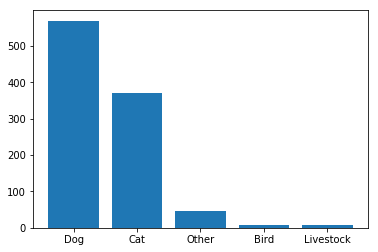

In [78]:
# Your code here
import matplotlib.pyplot as plt
x = list(animals.animal_type.value_counts().index)
y = list(animals.animal_type.value_counts().values)

fig,ax = plt.subplots()
ax.bar(x,y)
plt.show()

Questions lead to other questions. For the above example, the visualization begs the question, what Other animals are being adopted?

To find out, we need to know where the type of animal for Other is encoded.   
    
    What features do we need to answer what the most commonly adopted type of animal within the Other category is?

In [79]:
animals[animals['animal_type'] == 'Other']['breed'].value_counts()

Bat             22
Raccoon          5
Guinea Pig       5
Fox              4
Rabbit Sh        3
Opossum          2
Hedgehog         1
Turtle           1
Skunk            1
Squirrel         1
Snake/Python     1
Name: breed, dtype: int64

# Quick Exploration

In [80]:
# Use info to check for na's, datatypes, and shape
animals.isna().sum()

animal_id             0
name                345
datetime              0
monthyear             0
date_of_birth         0
outcome_type        100
animal_type           0
sex_upon_outcome      0
age_upon_outcome      0
breed                 0
color                 0
outcome_subtype     518
dtype: int64

In [81]:
# Use describe to gain a bit more detail about certain features. 
animals.describe()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
count,1000,655,1000,1000,1000,900,1000,1000,1000,1000,1000,482
unique,979,562,816,816,490,8,5,6,34,176,100,13
top,A825138,Luna,2020-12-04T11:07:00.000,2020-12-04T11:07:00.000,2020-08-21T00:00:00.000,Adoption,Dog,Neutered Male,2 years,Domestic Shorthair,Black/White,Partner
freq,3,6,6,6,19,484,570,352,197,227,105,214


In [82]:
# Use value counts to check a categorical feature's distribution
animals['color'].value_counts()[:20]

Black/White            105
Unknown                 97
Black                   65
Brown Tabby             64
Brown                   44
Brown/White             41
White                   28
Brown Tabby/White       27
Brown Brindle/White     27
Black/Brown             27
Tan/White               26
Blue Tabby              25
Orange Tabby            24
Tortie                  23
Tricolor                22
Tan                     22
White/Brown             20
Blue/White              19
White/Black             17
Brown/Black             16
Name: color, dtype: int64

In [83]:
# Use isna() for a more legible output (than .info()) of na distributions of our dataset.
animals.fillna('no_type_subtype', inplace=True)

Use fillna to fill animals with no name to 'unnamed'

In [84]:
animals.fillna('no_type_or_subtype', inplace=True)

In [85]:
animals.isna().sum()

animal_id           0
name                0
datetime            0
monthyear           0
date_of_birth       0
outcome_type        0
animal_type         0
sex_upon_outcome    0
age_upon_outcome    0
breed               0
color               0
outcome_subtype     0
dtype: int64

### Applying and using map and applymap from the Pandas library

The built in **map** operator takes a function and applies it to every element of an iterable

In [86]:
def divisible_by_5(number):
    
    '''
    Parameter: an integer
    return numbers divisible by five
    '''
    
    if number % 5 == 0:
        return True
    else:
        return False

numbers = [17,29,30045, 125]

list(map(divisible_by_5, numbers))   # will map function on each number in numbers


[False, False, True, True]

The Pandas library has several similar methods associated with Dataframes and Series. Let's explore them.

# DataFrame.applymap(), Series.map()  Series.apply()

## DataFrame.applymap()
The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [87]:
animals.applymap(type)  # string - will change a type of evry element in DF

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
2,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...
995,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
996,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
997,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
998,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


# Series.map()

The **.map()** method takes a function as input that it will then apply to every entry in the Series.

Let's map a ternary class set to consolodate sex_upon_outcome to male, female, or unknown   

First, explore the unique values:

In [88]:
animals['sex_upon_outcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Female', 'Intact Male',
       'Unknown', 'NULL'], dtype=object)

In [89]:
# we could also use np.unique() with the return_counts parameter

np.unique(animals['sex_upon_outcome'], return_counts=True)

(array(['Intact Female', 'Intact Male', 'NULL', 'Neutered Male',
        'Spayed Female', 'Unknown'], dtype=object),
 array([140, 171,   3, 352, 284,  50]))

In [90]:
# Your code here
animals['sex_consolidated'] = animals['sex_upon_outcome'].map( {'Infact Female':'f', 'Spayed Female':'f', 'Intact Male':'m', 'Neutered Male':'m'} )

In [91]:
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,sex_consolidated
0,A821019,Spot,2020-12-08T12:37:00.000,2020-12-08T12:37:00.000,2017-04-03T00:00:00.000,Adoption,Dog,Neutered Male,3 years,Pit Bull,White/Black,no_type_subtype,m
1,A824438,*Rose,2020-12-08T12:27:00.000,2020-12-08T12:27:00.000,2011-11-27T00:00:00.000,Adoption,Dog,Spayed Female,9 years,German Shepherd,Tan/Black,no_type_subtype,f
2,A825587,*Ludwig,2020-12-08T12:22:00.000,2020-12-08T12:22:00.000,2011-11-06T00:00:00.000,Adoption,Cat,Neutered Male,9 years,Domestic Medium Hair,Cream Tabby,Foster,m
3,A819626,no_type_subtype,2020-12-08T11:53:00.000,2020-12-08T11:53:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,5 months,Domestic Shorthair,White/Black,Foster,m
4,A819624,no_type_subtype,2020-12-08T11:52:00.000,2020-12-08T11:52:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,5 months,Domestic Shorthair,Black,Foster,m


# Series.apply()

Series.apply() is similar to .map, except it only takes a function as a parameter, whereas .map can take a list, dictionary, or function.  .apply() is meant for more complex functions.

Now let's define a custom function that converts all ages upon outcome to days, and create a new column with .apply():

In [92]:
# First, checkout what happens when we split on a space

list(animals['age_upon_outcome'].str.split(' '))[:5]


[['3', 'years'],
 ['9', 'years'],
 ['9', 'years'],
 ['5', 'months'],
 ['5', 'months']]

In [93]:
# animals['age_upon_outcome'].apply()

# Pair program #1: 
Take 10 minutes to fill in the function below with code that converts age upon outcome to days upon outcome.

In [94]:
# check what values we have for time frame
unit_values = [age[0] if age[0] == 'NULL' 
               else age[1] for age in 
               animals['age_upon_outcome'].str.split(' ')]
set(unit_values)

{'NULL', 'days', 'month', 'months', 'weeks', 'year', 'years'}

In [95]:
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,sex_consolidated
0,A821019,Spot,2020-12-08T12:37:00.000,2020-12-08T12:37:00.000,2017-04-03T00:00:00.000,Adoption,Dog,Neutered Male,3 years,Pit Bull,White/Black,no_type_subtype,m
1,A824438,*Rose,2020-12-08T12:27:00.000,2020-12-08T12:27:00.000,2011-11-27T00:00:00.000,Adoption,Dog,Spayed Female,9 years,German Shepherd,Tan/Black,no_type_subtype,f
2,A825587,*Ludwig,2020-12-08T12:22:00.000,2020-12-08T12:22:00.000,2011-11-06T00:00:00.000,Adoption,Cat,Neutered Male,9 years,Domestic Medium Hair,Cream Tabby,Foster,m
3,A819626,no_type_subtype,2020-12-08T11:53:00.000,2020-12-08T11:53:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,5 months,Domestic Shorthair,White/Black,Foster,m
4,A819624,no_type_subtype,2020-12-08T11:52:00.000,2020-12-08T11:52:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,5 months,Domestic Shorthair,Black,Foster,m


Now, fill in the definition below to convert the ages to days

In [96]:

def age_to_days(age):
    
    '''
    params: age upon outcome of shelter animal. 
    A number followed by a unit of time 
    'NULL', 'days', 'month', 'months', 'week', 'weeks', 'year', 'years'
    
    returns: days old at outcome
    '''
    
    age_split = age.split(' ')
    
    if len(age_split) == 1:
        return 0
    
    elif age_split[1].startswith('year'):
        return int(age_split[0])*365
    
    elif age_split[1].startswith('week'):
        return int(age_split[0])*7
    
    elif age_split[1].startswith('month'):
        return int(age_split[0])*30
    
    else: 
         return int(age_split[0])
    

In [97]:
animals['age_upon_outcome'].apply(age_to_days)

0      1095
1      3285
2      3285
3       150
4       150
       ... 
995    2555
996      60
997     120
998    1095
999      30
Name: age_upon_outcome, Length: 1000, dtype: int64

In [98]:
# Import solution to age todays
from src.sol import age_to_days
animals['age_upon_outcome']= animals['age_upon_outcome'].apply(age_to_days)


In [99]:
# Let's look at the average age upon outcome of Adopted animals


### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [100]:
list(map(lambda x: x + ' is '  + 
                    np.random.choice(['hungry', 'sleepy', 'hangry', 
                                      'super pumped about list comprehensions'],
                                     p=[.325,.325,.325,.025]), 
                 student_list))

['Anj is hungry',
 'Guy is hungry',
 'Ivan is sleepy',
 'DarigaSilverman is hungry',
 'Raf is hangry',
 'Emily is hungry',
 'Alex is hangry',
 'Christa is hangry',
 'Saad is sleepy']

# Student Screen Share
Use another lambda function to convert days days upon outcome to weeks upon outcome <br>


In [101]:
# Your code here

# Methods for Re-Organizing DataFrames: .groupby()

Those of you familiar with SQL have probably used the GROUP BY command. (And if you haven't, you'll see it very soon!) Pandas has this, too.

The .groupby() method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [28]:
animals.groupby('animal_type').mean()

,age_upon_outcome
animal_type,
Bird,469.285714
Cat,397.442529
Dog,821.215569
Livestock,180.000000
Other,690.326087


Notice the object type [DataFrameGroupBy](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) object. 

#### .groups and .get_group()

In [29]:
animals.groupby(['animal_type', 'outcome_type'])

In [30]:
# This retuns each group indexed by the group name: I.E. 'Bird', along with the row indices of each value
animals.groupby('animal_type').groups

{'Bird': [470, 668, 669, 670, 723, 796, 816], 'Cat': [2, 3, 4, 5, 17, 19, 24, 25, 35, 36, 37, 43, 44, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 66, 67, 68, 69, 70, 73, 77, 78, 85, 87, 88, 92, 97, 98, 99, 100, 101, 102, 103, 109, 111, 115, 119, 123, 135, 136, 137, 141, 160, 161, 165, 166, 168, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 197, 210, 213, 216, 230, 233, 234, 235, 237, 238, 239, 242, 249, 250, 253, 254, 255, 256, 257, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, ...], 'Dog': [0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 21, 22, 26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 40, 41, 42, 45, 46, 50, 51, 52, 63, 65, 71, 72, 74, 79, 80, 81, 82, 83, 84, 86, 89, 90, 91, 94, 95, 96, 104, 105, 106, 107, 108, 110, 112, 113, 114, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 162, 163, ...], 'Livestock': [76, 211, 337, 82

Once we know we are working with a type of object, it opens up a suite of attributes and methods. One attribute we can look at is groups.

In [31]:
animals.groupby('animal_type').get_group('Dog')

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,sex_consolidated
0,A821019,Spot,2020-12-08T12:37:00.000,2020-12-08T12:37:00.000,2017-04-03T00:00:00.000,Adoption,Dog,Neutered Male,1095.0,Pit Bull,White/Black,no_type_subtype,m
1,A824438,*Rose,2020-12-08T12:27:00.000,2020-12-08T12:27:00.000,2011-11-27T00:00:00.000,Adoption,Dog,Spayed Female,3285.0,German Shepherd,Tan/Black,no_type_subtype,f
6,A825091,*Darla,2020-12-08T11:44:00.000,2020-12-08T11:44:00.000,2019-10-27T00:00:00.000,Adoption,Dog,Spayed Female,365.0,Pit Bull,White/Black,Foster,f
7,A821660,*Juice,2020-12-08T11:41:00.000,2020-12-08T11:41:00.000,2015-08-20T00:00:00.000,Transfer,Dog,Neutered Male,1825.0,Pit Bull,White/Brown,Partner,m
8,A826472,*Electra,2020-12-08T11:37:00.000,2020-12-08T11:37:00.000,2018-11-29T00:00:00.000,Transfer,Dog,Intact Female,730.0,Pit Bull,Black,Partner,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,A825181,Bell,2020-11-04T15:54:00.000,2020-11-04T15:54:00.000,2020-02-29T00:00:00.000,Adoption,Dog,Spayed Female,240.0,Shetland Sheepdog Mix,Brown/Black,no_type_subtype,f
994,A695280,Laika,2020-11-04T15:37:00.000,2020-11-04T15:37:00.000,2013-01-12T00:00:00.000,Euthanasia,Dog,Spayed Female,2555.0,German Shepherd,Black/Brown,Aggressive,f
995,A676602,Farley,2020-11-04T13:56:00.000,2020-11-04T13:56:00.000,2013-10-12T00:00:00.000,Adoption,Dog,Neutered Male,2555.0,American Bulldog Mix,White/Brown Brindle,Foster,m
997,A825276,no_type_subtype,2020-11-04T13:24:00.000,2020-11-04T13:24:00.000,2020-07-01T00:00:00.000,Transfer,Dog,Intact Male,120.0,Doberman Pinsch,Brown,Partner,m


We can group by multiple columns, and also return a DataFrameGroupBy object

In [32]:
animals.groupby(['animal_type', 'outcome_type'])

In [33]:
animals.groupby(['animal_type', 'outcome_type']).groups.keys()

dict_keys([('Bird', 'Adoption'), ('Bird', 'Died'), ('Bird', 'Disposal'), ('Bird', 'no_type_subtype'), ('Cat', 'Adoption'), ('Cat', 'Died'), ('Cat', 'Disposal'), ('Cat', 'Euthanasia'), ('Cat', 'Return to Owner'), ('Cat', 'Rto-Adopt'), ('Cat', 'Transfer'), ('Cat', 'no_type_subtype'), ('Dog', 'Adoption'), ('Dog', 'Died'), ('Dog', 'Disposal'), ('Dog', 'Euthanasia'), ('Dog', 'Missing'), ('Dog', 'Return to Owner'), ('Dog', 'Rto-Adopt'), ('Dog', 'Transfer'), ('Dog', 'no_type_subtype'), ('Livestock', 'Euthanasia'), ('Livestock', 'no_type_subtype'), ('Other', 'Adoption'), ('Other', 'Died'), ('Other', 'Disposal'), ('Other', 'Euthanasia'), ('Other', 'Transfer')])

#### Aggregating

In [34]:
# Just like with single axis groups, we can aggregate on multiple axis
animals.groupby(['animal_type', 'outcome_type']).mean()

age_upon_outcome
animal_type outcome_type                     
Bird        Adoption               365.000000
            Died                   730.000000
            Disposal               730.000000
            no_type_subtype        365.000000
Cat         Adoption               262.312253
            Died                    60.000000
            Disposal               730.000000
            Euthanasia            1511.833333
            Return to Owner        724.090909
            Rto-Adopt             6205.000000
            Transfer               573.276923
            no_type_subtype        730.000000
Dog         Adoption               698.671171
            Died                  1832.000000
            Disposal               797.000000
            Euthanasia            1959.000000
            Missing                 21.000000
            Return to Owner       1341.808511
            Rto-Adopt             1216.666667
            Transfer               576.830189
            no_type_subtype               NaN
Livestock   Euthanasia             180.000000
            no_type_subtype               NaN
Other       Adoption               973.333333
            Died                   730.000000
            Disposal               730.000000
            Euthanasia             646.571429
            Transfer               608.333333

In [35]:
# We can then get a specific group, such as Cats that were adopted
animals.groupby(['animal_type', 'outcome_type']).get_group(('Cat', 'Adoption'))

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,sex_consolidated
2,A825587,*Ludwig,2020-12-08T12:22:00.000,2020-12-08T12:22:00.000,2011-11-06T00:00:00.000,Adoption,Cat,Neutered Male,3285.0,Domestic Medium Hair,Cream Tabby,Foster,m
3,A819626,no_type_subtype,2020-12-08T11:53:00.000,2020-12-08T11:53:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,150.0,Domestic Shorthair,White/Black,Foster,m
4,A819624,no_type_subtype,2020-12-08T11:52:00.000,2020-12-08T11:52:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,150.0,Domestic Shorthair,Black,Foster,m
17,A825246,no_type_subtype,2020-12-08T10:58:00.000,2020-12-08T10:58:00.000,2020-09-04T00:00:00.000,Adoption,Cat,Neutered Male,90.0,Domestic Shorthair,Gray Tabby/White,Foster,m
25,A826721,Sativa,2020-12-07T18:11:00.000,2020-12-07T18:11:00.000,2019-12-04T00:00:00.000,Adoption,Cat,Spayed Female,365.0,Domestic Shorthair Mix,Black/White,no_type_subtype,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,A823832,*Holden,2020-11-05T12:16:00.000,2020-11-05T12:16:00.000,2020-08-17T00:00:00.000,Adoption,Cat,Neutered Male,60.0,Domestic Shorthair,Brown Tabby/White,Foster,m
981,A823893,*Phoebe,2020-11-05T12:09:00.000,2020-11-05T12:09:00.000,2020-08-10T00:00:00.000,Adoption,Cat,Spayed Female,60.0,Domestic Shorthair,Silver Tabby,Foster,f
983,A823911,*Bunny,2020-11-05T10:33:00.000,2020-11-05T10:33:00.000,2020-08-17T00:00:00.000,Adoption,Cat,Spayed Female,60.0,Domestic Shorthair,Brown Tabby,Foster,f
992,A823026,*Banana,2020-11-04T16:01:00.000,2020-11-04T16:01:00.000,2020-08-21T00:00:00.000,Adoption,Cat,Neutered Male,60.0,Domestic Shorthair Mix,Orange Tabby,Foster,m


In [36]:
# Other methods
animals.groupby(['animal_type', 'outcome_type']).first()

animal_id             name  \
animal_type outcome_type                                 
Bird        Adoption          A825549  no_type_subtype   
            Died              A825560  no_type_subtype   
            Disposal          A826140  no_type_subtype   
            no_type_subtype   A824708             Loko   
Cat         Adoption          A825587          *Ludwig   
            Died              A823214  no_type_subtype   
            Disposal          A826207  no_type_subtype   
            Euthanasia        A826415  no_type_subtype   
            Return to Owner   A826884  no_type_subtype   
            Rto-Adopt         A825478            Ditto   
            Transfer          A826564  no_type_subtype   
            no_type_subtype   A825923           Harvey   
Dog         Adoption          A821019             Spot   
            Died              A690421            Tyson   
            Disposal          A826087           Bertha   
            Euthanasia        A825027           *Moody   
            Missing           A824954  no_type_subtype   
            Return to Owner   A826860          Chi Chi   
            Rto-Adopt         A826382            Rocky   
            Transfer          A821660           *Juice   
            no_type_subtype   A826701           Chubby   
Livestock   Euthanasia        A826448  no_type_subtype   
            no_type_subtype   A825584            Daisy   
Other       Adoption          A826601  no_type_subtype   
            Died              A826413  no_type_subtype   
            Disposal          A826139  no_type_subtype   
            Euthanasia        A826848  no_type_subtype   
            Transfer          A826355  no_type_subtype   

                                            datetime                monthyear  \
animal_type outcome_type                                                        
Bird        Adoption         2020-11-14T13:24:00.000  2020-11-14T13:24:00.000   
            Died             2020-11-10T09:03:00.000  2020-11-10T09:03:00.000   
            Disposal         2020-11-23T09:00:00.000  2020-11-23T09:00:00.000   
            no_type_subtype  2020-11-12T17:15:00.000  2020-11-12T17:15:00.000   
Cat         Adoption         2020-12-08T12:22:00.000  2020-12-08T12:22:00.000   
            Died             2020-11-25T17:12:00.000  2020-11-25T17:12:00.000   
            Disposal         2020-11-24T09:00:00.000  2020-11-24T09:00:00.000   
            Euthanasia       2020-12-02T09:58:00.000  2020-12-02T09:58:00.000   
            Return to Owner  2020-12-08T11:49:00.000  2020-12-08T11:49:00.000   
            Rto-Adopt        2020-11-10T12:01:00.000  2020-11-10T12:01:00.000   
            Transfer         2020-12-07T18:13:00.000  2020-12-07T18:13:00.000   
            no_type_subtype  2020-12-08T00:00:00.000  2020-12-08T00:00:00.000   
Dog         Adoption         2020-12-08T12:37:00.000  2020-12-08T12:37:00.000   
            Died             2020-11-16T10:25:00.000  2020-11-16T10:25:00.000   
            Disposal         2020-11-23T09:01:00.000  2020-11-23T09:01:00.000   
            Euthanasia       2020-12-07T15:40:00.000  2020-12-07T15:40:00.000   
            Missing          2020-11-09T10:35:00.000  2020-11-09T10:35:00.000   
            Return to Owner  2020-12-08T11:20:00.000  2020-12-08T11:20:00.000   
            Rto-Adopt        2020-12-04T11:48:00.000  2020-12-04T11:48:00.000   
            Transfer         2020-12-08T11:41:00.000  2020-12-08T11:41:00.000   
            no_type_subtype  2020-12-04T14:47:00.000  2020-12-04T14:47:00.000   
Livestock   Euthanasia       2020-11-28T15:40:00.000  2020-11-28T15:40:00.000   
            no_type_subtype  2020-12-06T00:00:00.000  2020-12-06T00:00:00.000   
Other       Adoption         2020-12-06T11:22:00.000  2020-12-06T11:22:00.000   
            Died             2020-11-28T08:05:00.000  2020-11-28T08:05:00.000   
            Disposal         2020-11-24T00:00:00.000  2020-11-24T00:00:00.000   
            Euthana